In [69]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import LineString, Point, Polygon
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
data_path = "./data"
files = os.listdir(data_path)
len(files)

1

In [50]:
fname = files[0]

In [53]:
data = pd.read_pickle(os.path.join(data_path,files[0]))
time = dt.datetime.strptime(fname.split(".")[0], "%Y-%m-%d %H-%M-%S")+dt.timedelta(hours=5)

In [12]:
rws = data['RWS'][0]['RW']
fis = [x['FIS'][0]['FI'] for x in rws]

In [24]:
fisis = [direction for subfis in fis for direction in subfis]

In [28]:
#Jam Factor
JFS = [x['CF'][0]['JF'] for x in fisis]

In [29]:
IDS = [str(x['TMC']['PC'])+x['TMC']['QD'] for x in fisis]

In [33]:
LIS = [x['LI'] for x in rws]
SHPS = [x['SHP'] for x in fisis]
FCS = [np.mean([x['FC'] for x in y]) for y in SHPS]
SHPS_string=["".join(list(np.array([x['value'] for x in shp]).flatten())) for shp in SHPS]

In [35]:
df = pd.DataFrame({'JF':JFS,'FC':FCS,'ID':IDS,'shape':SHPS_string})

In [42]:
df.head()

,JF,FC,ID,shape
0,0.00000,3.0,383+,"-6.14397,106.88627 -6.1443,106.88617"
1,2.18403,3.0,382+,"-6.14915,106.88461 -6.14923,106.88459 -6.14931..."
2,0.33059,3.0,382-,"-6.14956,106.88459 -6.14941,106.88458 -6.14941..."
3,0.00000,3.0,383-,"-6.1443,106.88617 -6.14397,106.88627 -6.14915,..."
4,0.00000,4.0,385-,"-6.17761,106.62998 -6.17767,106.63034"


In [38]:
len(df)

16975

In [49]:
gdf = df[['ID','shape','FC']].copy()
gdf['geometry'] = gdf['shape'].apply(lambda s: LineString(map(lambda x: Point(eval(x)[::-1]),s.strip().split(" "))))
gdf=gpd.GeoDataFrame(gdf)
gdf.crs = {'init':'epsg:4326'}
gdf.head()

,ID,shape,FC,geometry
0,383+,"-6.14397,106.88627 -6.1443,106.88617",3.0,"LINESTRING (106.88627 -6.14397, 106.88617 -6.1..."
1,382+,"-6.14915,106.88461 -6.14923,106.88459 -6.14931...",3.0,"LINESTRING (106.88461 -6.14915, 106.88459 -6.1..."
2,382-,"-6.14956,106.88459 -6.14941,106.88458 -6.14941...",3.0,"LINESTRING (106.88459 -6.14956, 106.88458 -6.1..."
3,383-,"-6.1443,106.88617 -6.14397,106.88627 -6.14915,...",3.0,"LINESTRING (106.88617 -6.1443, 106.88627 -6.14..."
4,385-,"-6.17761,106.62998 -6.17767,106.63034",4.0,"LINESTRING (106.62998 -6.17761, 106.63034 -6.1..."


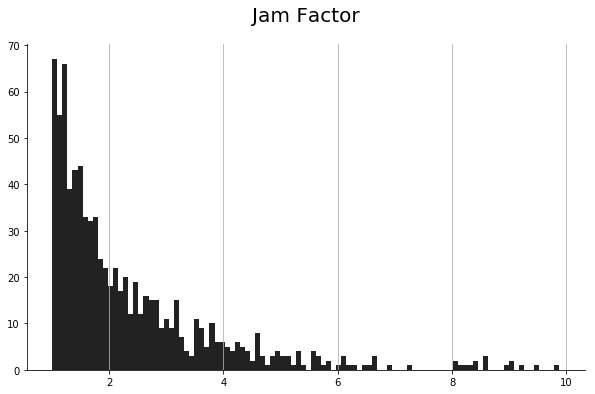

In [57]:
# now let's take a look at the jam factor
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
df[df.JF>1].JF.hist(bins=100, color="#222222",ax=ax)
ax.set_title("Jam Factor", fontsize=20, y=1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis="y")


In [58]:
df['group']=pd.cut(df.JF,[-1,1,3,4,8,11]).cat.codes

In [78]:
gdf.shape

(16975, 4)

In [103]:
type(gdf.geometry[0])

shapely.geometry.linestring.LineString

In [104]:
type(bd.geometry[0])

shapely.geometry.polygon.Polygon

In [94]:
gdf_clean.shape

(16975, 4)

In [96]:
# my geo
u,l=-6.049427, 106.525587
b,r=-6.511087, 107.183457
x = [l,r,r,l]
y = [b,b,u,u]
bound=Polygon([[px, py] for px,py in zip(x,y)])
bd=gpd.GeoDataFrame(pd.Series([bound]).reset_index().rename(columns={0:'geometry'}))
bd.crs={'init':'epsg:4326'}

In [97]:
gdf_ok = gpd.sjoin(gdf,bd)

AttributeError: 'NoneType' object has no attribute 'intersection'

In [117]:
fp = "./Vaestotietoruudukko_2015.shp"

# Read the data
pop = gpd.read_file(fp)
pop = pop.rename(columns={'ASUKKAITA': 'pop15'})
selected_cols = ['pop15', 'geometry']
pop = pop[selected_cols]

In [118]:
addr_fp = r"./addresses_epsg3879.shp"
addresses = gpd.read_file(addr_fp)

In [124]:
join = gpd.sjoin(addresses, pop, how="inner", op="within")

/Users/fadhil/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({} != {'init': 'epsg:3879'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


AttributeError: 'NoneType' object has no attribute 'intersection'